In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_files = glob.glob('/content/drive/Shareddrives/ML_project/zip_files/*')

In [ ]:
zip_files[0].split('/')[-1].split('.')[0]

'Top'

In [ ]:
import zipfile

In [ ]:
for idx,i in enumerate(zip_files):
    file_name = zip_files[idx].split('/')[-1].split('.')[0]
    print(i)
    with zipfile.ZipFile(i) as existing_zip:
        existing_zip.extractall('/content/drive/Shareddrives/ML_project/ML_data/'+file_name)

# /content/drive/MyDrive/Colab Notebooks/ML_final_data/Top
# '/content/drive/MyDrive/Colab Notebooks/ML_final_data/'+'file_name'

/content/drive/Shareddrives/ML_project/zip_files/Top.zip


In [ ]:
# /content/drive/MyDrive/Colab Notebooks/ML_final_data/Anorak
total=0
for idx,i in enumerate(zip_files):
    name = zip_files[idx].split('/')[-1].split('.')[0]
    number = len(glob.glob('/content/drive/Shareddrives/ML_project/ML_data/'+name+'/*'))
    print(number)
    total += number
print('total-------')
print(total)

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import glob

In [ ]:
def fileList(path_before : str)->list : 
    file_list = os.listdir(path_before) 
    category=[]
    for file in file_list: 
        temp_list = file.split("_")  
        category.append(temp_list[0]) 
    print(len(category))
    temp_set = set(category) 
    result = list(temp_set)
    return result 

# C:\Users\LG그램\Desktop\img1

In [ ]:
filelist = fileList('/content/drive/Shareddrives/ML_project/ML_data/')

45


In [ ]:
# count=0
# for file in filelist:
#     ar = glob.glob('/content/drive/MyDrive/Colab Notebooks/img_final/img/*_' + file + '/*')
#     for num, a in enumerate(ar):s
#         file_modified = os.path.join('/content/drive/MyDrive/Colab Notebooks/ML_data/'+file, file + '_' + str(num)+'.jpg')
#         shutil.copy(a, file_modified)
#     count+=1
#     print(count)


In [ ]:
file_dict = {string : i for i, string in enumerate(filelist)}

In [ ]:
p = transforms.Compose([
    transforms.Resize([227,227]),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
len(glob.glob('/content/drive/MyDrive/Colab Notebooks/ML_final_data/./**/*.jpg')   )

217071

In [ ]:
%cd /content/drive/Shareddrives/ML_project

/content/drive/Shareddrives/ML_project


In [ ]:
from torchvision.datasets import ImageFolder 

dataset = ImageFolder(root='./ML_data', transform=p)


In [ ]:

len(dataset.targets)

217071

In [ ]:
from sklearn.model_selection import train_test_split
from torchvision.datasets import ImageFolder 

dataset = ImageFolder(root='./ML_data', transform=p)
train_indices, val_indices = train_test_split(list(range(len(dataset.targets))), test_size=0.2, stratify=dataset.targets)
train_dataset = torch.utils.data.Subset(dataset, train_indices)
val_dataset = torch.utils.data.Subset(dataset, val_indices)

In [ ]:
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=2, drop_last=True)
test_data_loader = torch.utils.data.DataLoader(val_dataset, batch_size=256, shuffle=True, num_workers=2, drop_last=True)

In [ ]:
torch.save(train_data_loader, './train_data_loader.pth')

In [ ]:
torch.save(val_data_loader, 'val_data_loader.pth')

In [ ]:
import torchvision.models as models
model = models.alexnet(pretrained=True)

In [ ]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
model.classifier[6] = nn.Linear(in_features=4096, out_features=45, bias=True)

In [ ]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
for name, param in model.named_parameters():
#     print(name)
    if name in ['classifier.6.weight', 'classifier.6.bias']:
        param.requires_grad = True

In [ ]:
for name, param in model.named_parameters():
    if param.requires_grad == True:
        print(name)

classifier.1.weight
classifier.1.bias
classifier.4.weight
classifier.4.bias
classifier.6.weight
classifier.6.bias


In [ ]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
model.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
loss_list = []
model.train()
for epoch in range(3): 
    running_loss = 0.0
    for i, data in enumerate(train_data_loader, 0):
        
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output = model(inputs)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        print(loss.item())
        loss_list.append(loss.item())
    torch.save(model, f'./model_unfreeze_three_layers_{epoch}.pt')
    print(f'------------ {epoch} finished!!! ------------')
print('Finished Training of AlexNet')

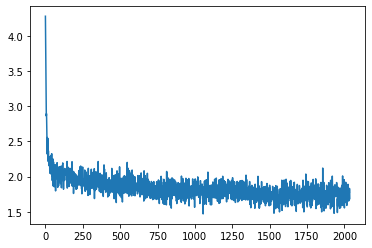

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_list)

In [ ]:
len(train_data_loader)

679

In [ ]:
loss_only_unfreeze_third = loss_list

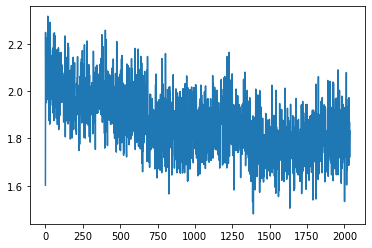

In [ ]:
plt.plot(loss_only_unfreeze_third)

In [ ]:
loss_only_unfreeze_second = loss_list

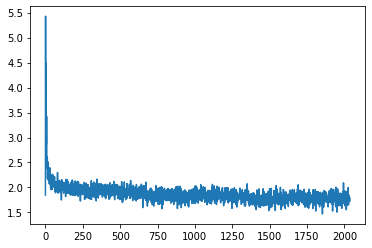

In [ ]:
plt.plot(loss_only_unfreeze_second)

In [ ]:
loss_only_unfreeze_last = loss_list

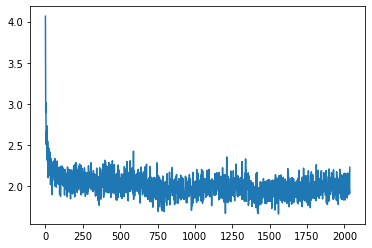

In [ ]:
plt.plot(loss_only_unfreeze_last)

model = torch.hub.load('googlenet', pretrained=True).to(device)

In [ ]:
import torchvision.models as models
model = models.googlenet(pretrained=True) 

In [ ]:
model 

In [ ]:
model.fc = nn.Linear(in_features=1024, out_features=45, bias=True)

In [ ]:
for param in model.parameters():
    param.requires_grad = False

In [ ]:
for name, param in model.named_parameters():
#     print(name)
    if name in ['fc.weight','fc.bias']:
        param.requires_grad = True

In [ ]:
for name, param in model.named_parameters():
    if param.requires_grad == True:
        print(name)

fc.weight
fc.bias


In [ ]:
model.to(device)

In [ ]:
loss_list = []
for epoch in range(3):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_data_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output = model(inputs)
        loss = criterion(output, labels)
#         loss = F.cross_entropy(output, labels)
        loss.backward()
        optimizer.step()
        print(loss.item())
        loss_list.append(loss.item())
    torch.save(model, f'./googlenet_unfreeze_last_layer_{epoch}.pt')
    print(f'------------ {epoch} finished!!! ------------')
print('Finished Training of GoogleNet')

In [ ]:
loss_only_unfreeze_last_googlenet = loss_list

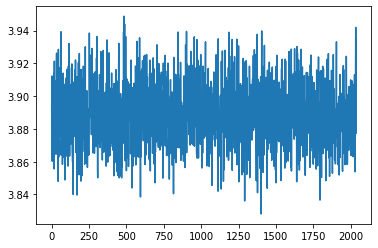

In [ ]:
plt.plot(loss_only_unfreeze_last_googlenet)

In [ ]:
def test(epoch, model, data_loader, criterion, device):
    model.eval()
    with torch.no_grad():
        total = 0
        correct = 0
        cnt = 0
        for i, (imgs, labels) in enumerate(data_loader):
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            total += imgs.size(0)
            _, argmax = torch.max(outputs, 1)
            correct += (labels == argmax).sum().item()
            cnt += 1

        print('Accuracy: {:.2f}%'.format(correct / total * 100))

In [ ]:
model = torch.load('./model_unfreeze_third_layer_2.pt')

In [ ]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
files = glob.glob('/content/drive/Shareddrives/ML_project/*.pt')

In [ ]:
files

['/content/drive/Shareddrives/ML_project/model_unfreeze_last_layer0.pt',
 '/content/drive/Shareddrives/ML_project/model_unfreeze_last_layer1.pt',
 '/content/drive/Shareddrives/ML_project/model_unfreeze_last_layer2.pt',
 '/content/drive/Shareddrives/ML_project/model_unfreeze_second_layer_0.pt',
 '/content/drive/Shareddrives/ML_project/model_unfreeze_second_layer_1.pt',
 '/content/drive/Shareddrives/ML_project/model_unfreeze_second_layer_2.pt',
 '/content/drive/Shareddrives/ML_project/model_unfreeze_third_layer_0.pt',
 '/content/drive/Shareddrives/ML_project/model_unfreeze_third_layer_1.pt',
 '/content/drive/Shareddrives/ML_project/model_unfreeze_third_layer_2.pt',
 '/content/drive/Shareddrives/ML_project/googlenet_unfreeze_last_layer_0.pt',
 '/content/drive/Shareddrives/ML_project/googlenet_unfreeze_last_layer_1.pt',
 '/content/drive/Shareddrives/ML_project/googlenet_unfreeze_last_layer_2.pt',
 '/content/drive/Shareddrives/ML_project/model_unfreeze_three_layers_0.pt',
 '/content/drive/S

In [ ]:
try:
    for pt in files:
        pt = pt.split('/')[-1]
        model = torch.load(pt)
        if pt.startswith('model'):
            print('alexnet_'+pt)
        else:
            print(pt)
        validation(1, model, val_data_loader,criterion, device)
        print('-'*50)
except:
    pass

alexnet_model_unfreeze_last_layer0.pt
Accuracy: 42.81%
--------------------------------------------------
alexnet_model_unfreeze_last_layer1.pt
Accuracy: 43.47%
--------------------------------------------------
alexnet_model_unfreeze_last_layer2.pt
Accuracy: 42.64%
--------------------------------------------------
alexnet_model_unfreeze_second_layer_0.pt
Accuracy: 45.86%
--------------------------------------------------
alexnet_model_unfreeze_second_layer_1.pt
Accuracy: 47.50%
--------------------------------------------------
alexnet_model_unfreeze_second_layer_2.pt
Accuracy: 47.93%
--------------------------------------------------
alexnet_model_unfreeze_third_layer_0.pt
Accuracy: 47.34%
--------------------------------------------------
alexnet_model_unfreeze_third_layer_1.pt
Accuracy: 47.56%
--------------------------------------------------
alexnet_model_unfreeze_third_layer_2.pt
Accuracy: 49.91%
--------------------------------------------------
googlenet_unfreeze_last_layer_0

In [ ]:
img = Image.open('./Blazer_8.jpg')

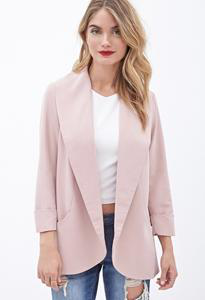

In [ ]:
img

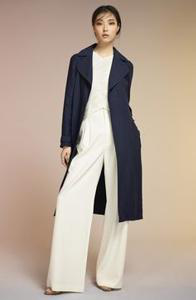

In [ ]:
img

In [ ]:
dataset = {'Anorak': 0,
 'Blazer': 1,
 'Blouse': 2,
 'Bomber': 3,
 'Button-Down': 4,
 'Caftan': 5,
 'Capris': 6,
 'Cardigan': 7,
 'Chinos': 8,
 'Coat': 9,
 'Coverup': 10,
 'Culottes': 11,
 'Cutoffs': 12,
 'Flannel': 13,
 'Gauchos': 14,
 'Halter': 15,
 'Henley': 16,
 'Hoodie': 17,
 'Jacket': 18,
 'Jeans': 19,
 'Jeggings': 20,
 'Jersey': 21,
 'Jodhpurs': 22,
 'Joggers': 23,
 'Jumpsuit': 24,
 'Kaftan': 25,
 'Kimono': 26,
 'Leggings': 27,
 'Onesie': 28,
 'Parka': 29,
 'Peacoat': 30,
 'Poncho': 31,
 'Robe': 32,
 'Romper': 33,
 'Sarong': 34,
 'Shorts': 35,
 'Skirt': 36,
 'Sweater': 37,
 'Sweatpants': 38,
 'Sweatshorts': 39,
 'Tank': 40,
 'Tee': 41,
 'Top': 42,
 'Trunks': 43,
 'Turtleneck': 44}

In [ ]:
data = {v: i for i,v in dataset.items()}
data

{0: 'Anorak',
 1: 'Blazer',
 2: 'Blouse',
 3: 'Bomber',
 4: 'Button-Down',
 5: 'Caftan',
 6: 'Capris',
 7: 'Cardigan',
 8: 'Chinos',
 9: 'Coat',
 10: 'Coverup',
 11: 'Culottes',
 12: 'Cutoffs',
 13: 'Flannel',
 14: 'Gauchos',
 15: 'Halter',
 16: 'Henley',
 17: 'Hoodie',
 18: 'Jacket',
 19: 'Jeans',
 20: 'Jeggings',
 21: 'Jersey',
 22: 'Jodhpurs',
 23: 'Joggers',
 24: 'Jumpsuit',
 25: 'Kaftan',
 26: 'Kimono',
 27: 'Leggings',
 28: 'Onesie',
 29: 'Parka',
 30: 'Peacoat',
 31: 'Poncho',
 32: 'Robe',
 33: 'Romper',
 34: 'Sarong',
 35: 'Shorts',
 36: 'Skirt',
 37: 'Sweater',
 38: 'Sweatpants',
 39: 'Sweatshorts',
 40: 'Tank',
 41: 'Tee',
 42: 'Top',
 43: 'Trunks',
 44: 'Turtleneck'}

In [ ]:
img = Image.open('/content/drive/Shareddrives/ML_project/ML_data/Coat/Coat_1.jpg')
img = p(img)
img = img.to(device)
img = img.unsqueeze(0)
model = torch.load('/content/drive/MyDrive/Colab Notebooks/model_unfreeze_three_layers_2.pt')
model = model.to(device)

model.eval()
with torch.no_grad():
    result = model(img)

dataset.classes[torch.argmax(result,1).item()]

'Blazer'

In [ ]:
result

tensor([[-2.8199,  2.8412,  0.7742, -2.6334, -4.9682, -6.5868, -4.2117,  1.0055,
         -0.5113,  2.1693, -8.5969, -2.0406, -4.8272, -2.1140, -2.4399, -5.8876,
         -2.8140, -1.1900,  2.1135,  0.8867, -2.8514, -1.6841, -4.6279, -0.8906,
          1.3120, -9.6252, -2.5809,  0.0918, -3.0807, -0.6386,  1.0313, -3.4927,
         -4.1043, -1.0838, -9.8231, -0.1761, -0.5760,  0.8558, -0.4257, -1.9693,
         -1.5436,  0.3700, -0.4834, -6.7606, -3.0478]], device='cuda:0')

In [ ]:
img = Image.open('/content/drive/Shareddrives/ML_project/ML_data/Skirt/Skirt_1.jpg')
img = p(img)
img = img.to(device)
img = img.unsqueeze(0)
model = torch.load('./model_unfreeze_three_layers_2.pt')
model = model.to(device)

model.eval()
with torch.no_grad():
    result = model(img)

dataset.classes[torch.argmax(result,1).item()]

'Skirt'

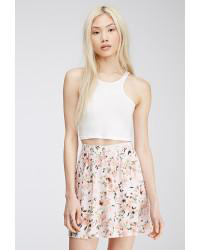

In [ ]:
Image.open('./ML_data/Skirt/Skirt_1.jpg')

In [ ]:
!cp *.pt /content/drive/MyDrive/"Colab Notebooks"

In [ ]:
img = Image.open('./ML_data/Skirt/Skirt_1.jpg')
img = p(img)
img = img.to(device)
img = img.unsqueeze(0)
model = torch.load('./model_unfreeze_third_layer_2.pt')
model = model.to(device)

model.eval()
with torch.no_grad():
    result = model(img)

dataset.classes[torch.argmax(result,1).item()]

'Tank'

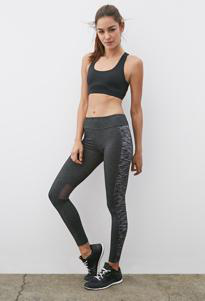

In [ ]:
Image.open('./ML_data/Tank/Tank_3.jpg')